In [1]:
import numpy as np
import pImpactR as impact
import matplotlib.pyplot as plt
int = np.vectorize(int)

In [2]:
beam, lattice = impact.readInputFile('test_IOTA.in')
ke   = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency
betx = 1.9065054393933862
alfx = 1.408226172730429
Nturn = np.array([128,256,512,1024])
Nskip = int(Nturn/64)
index = 2064

reading ImpactZ input file (test_IOTA.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [3]:
indexTBT,TBTdata = impact.readTBT(index,ke,mass,freq)
TBTdata = TBTdata[0,:,:]
indexTBT,TBTdata_Inv = impact.readTBT_integral(index)
dim,npt=TBTdata.shape

In [4]:
DiffLog = np.zeros([len(Nturn),3,npt])
iMax = np.zeros([len(Nturn)],dtype=np.int)
invH = np.zeros([len(Nturn),npt])
invI = np.zeros([len(Nturn),npt])
invA = np.zeros([len(Nturn),npt])
for n in range(len(Nturn)):
    nturn = Nturn[n]*2
    for ipt in range(npt):
        invH[n,ipt] = np.std(TBTdata_Inv[:nturn,0,ipt])
        invI[n,ipt] = np.std(TBTdata_Inv[:nturn,1,ipt]**2)
    invA[n,:] = np.sqrt(invH[n,:]**2+invI[n,:]**2)
    iMax[n] = np.argmax(invA[n,:])

# plot

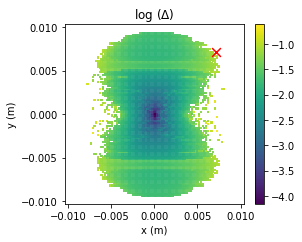

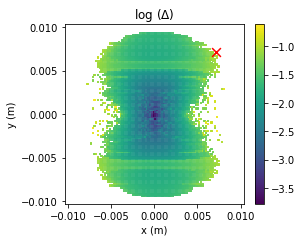

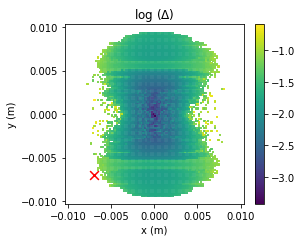

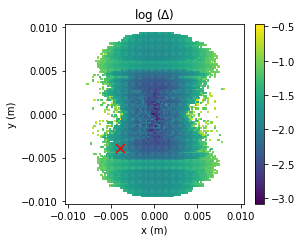

In [6]:
xmax = np.max([TBTdata[0,:],TBTdata[2,:]])
for n in range(len(Nturn)):
    plt.figure(figsize=[4,3.3])
    f1=plt.scatter(TBTdata[0,:],TBTdata[2,:],c=np.log10(invA[n,:]),s=1.6,marker='s')
    plt.scatter(TBTdata[0,iMax[n]],TBTdata[0,iMax[n]],c='r',s=77,marker='x')
    plt.xlim(-xmax*1.1,xmax*1.1)
    plt.ylim(-xmax*1.1,xmax*1.1)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(r'log ($\Delta$)')
    plt.colorbar(f1)
    plt.savefig('Inv.DA.Log.A.'+str(2*Nturn[n])+'.png',dpi=180)
    # plt.close()